# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [3]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              94276197      1   
                                                  1898519320    1   
                                                  2039840440    1   
                                                  2267451053    1   
                                                  3211007287    1   
                                                  3576837185    1   
                                                  4235843964    1   
{'name': 'comm', 'type': 'function'}              94276197      3   
                                                  1898519320    3   
                                                  2039840440    3   
                                                  2267451053    3   
                                                  3211007287    3   
                                                  3576837185    3   
                                                  4235843964    3   
{'name': 'MPI_Barrier', 'type': 'function'}       94276197      4   
                                                  1898519320    4   
                                                  2039840440    4   
                                                  2267451053    4   
                                                  3211007287    4   
                                                  3576837185    4   
                                                  4235843964    4   
{'name': 'comm_large', 'type': 'function'}        94276197      5   
                                                  1898519320    5   
                                                  2039840440    5   
                                                  2267451053    5   
                                                  3211007287    5   
                                                  3576837185    5   
                                                  4235843964    5   
{'name': 'MPI_Gather', 'type': 'function'}        94276197      7   
                                                  1898519320    7   
                                                  2039840440    7   
                                                  2267451053    7   
                                                  3211007287    7   
                                                  3576837185    7   
                                                  4235843964    7   
{'name': 'MPI_Scatter', 'type': 'function'}       94276197      6   
                                                  1898519320    6   
                                                  2039840440    6   
                                                  2267451053    6   
                                                  3211007287    6   
                                                  3576837185    6   
                                                  4235843964    6   
{'name': 'comp', 'type': 'function'}              94276197      8   
                                                  1898519320    8   
                                                  2039840440    8   
                                                  2267451053    8   
                                                  3211007287    8   
                                                  3576837185    8   
                                                  4235843964    8   
{'name': 'comp_large', 'type': 'function'}        94276197      9   
                                                  1898519320    9   
                                                  2039840440    9   
                                                  2267451053    9   
                                                  3211007287    9   
                                                  3576837185    9   
                                                  4235843964    9   
{'name': 'correctness_check', 'type': 'function'} 94276197  

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,num_threads,num_blocks,group_num,implementation_source,Whole computation time
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
94276197,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-random.cali,true,1700090538,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,2,1,1,19,Handwritten,0.325883
1898519320,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a1048576-random.cali,true,1700090667,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,16,1,1,19,Handwritten,0.743009
2039840440,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a1048576-random.cali,true,1700090568,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,8,1,1,19,Handwritten,0.328449
2267451053,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a1048576-random.cali,true,1700090667,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,32,1,1,19,Handwritten,1.383260
3211007287,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576-random.cali,true,1700090568,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,4,1,1,19,Handwritten,0.326094
3576837185,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p128-a1048576-random.cali,true,1700090890,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,128,1,1,19,Handwritten,5.443695
4235843964,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a1048576-random.cali,true,1700090696,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,64,1,1,19,Handwritten,2.835355


In [6]:
gb = tk.groupby("InputSize")

1  thickets created...
{1048576: <thicket.thicket.Thicket object at 0x2ab7df4e8f70>}


Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="mpi.world.size"
)

In [8]:
ctk.dataframe

1048576  \
                                                                     nid   
node                                              mpi.world.size           
{'name': 'main', 'type': 'function'}              2                    1   
                                                  4                    1   
                                                  8                    1   
                                                  16                   1   
                                                  32                   1   
                                                  64                   1   
                                                  128                  1   
{'name': 'comm', 'type': 'function'}              2                    3   
                                                  4                    3   
                                                  8                    3   
                                                  16                   3   
                                                  32                   3   
                                                  64                   3   
                                                  128                  3   
{'name': 'MPI_Barrier', 'type': 'function'}       2                    4   
                                                  4                    4   
                                                  8                    4   
                                                  16                   4   
                                                  32                   4   
                                                  64                   4   
                                                  128                  4   
{'name': 'comm_large', 'type': 'function'}        2                    5   
                                                  4                    5   
                                                  8                    5   
                                                  16                   5   
                                                  32                   5   
                                                  64                   5   
                                                  128                  5   
{'name': 'MPI_Gather', 'type': 'function'}        2                    7   
                                                  4                    7   
                                                  8                    7   
                                                  16                   7   
                                                  32                   7   
                                                  64                   7   
                                                  128                  7   
{'name': 'MPI_Scatter', 'type': 'function'}       2                    6   
                                                  4                    6   
                                                  8                    6   
                                                  16                   6   
                                                  32                   6   
                                                  64                   6   
                                                  128                  6   
{'name': 'comp', 'type': 'function'}              2                    8   
                                                  4                    8   
                                                  8                    8   
                                                  16                   8   
                                                  32                   8   
                                                  64                   8   
                                                  128                  8   
{'name': 'comp_large', 'type': 'function'}        2                    9   
                                     

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (1048576, "nid")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])
ctk.dataframe

1048576                              \
                                   spot.channel Min time/rank Max time/rank   
name              mpi.world.size                                              
main              2               regionprofile      0.307898      0.604069   
                  4               regionprofile      0.321849      0.613676   
                  8               regionprofile      0.381673      0.822363   
                  16              regionprofile      6.132533      7.161777   
                  32              regionprofile      6.380453      7.958019   
                  64              regionprofile      1.609906      4.016282   
                  128             regionprofile      2.861969      7.699905   
comm              2               regionprofile      0.007105      0.048054   
                  4               regionprofile      0.006249      0.045396   
                  8               regionprofile      0.008560      0.042357   
                  16              regionprofile      0.070190      0.148806   
                  32              regionprofile      0.085066      0.272779   
                  64              regionprofile      0.252262      0.531287   
                  128             regionprofile      0.331215      0.764292   
MPI_Barrier       2               regionprofile      0.004123      0.043427   
                  4               regionprofile      0.004248      0.043378   
                  8               regionprofile      0.005584      0.040048   
                  16              regionprofile      0.043217      0.139307   
                  32              regionprofile      0.044928      0.272597   
                  64              regionprofile      0.114201      0.524673   
                  128             regionprofile      0.125640      0.741467   
comm_large        2               regionprofile      0.002940      0.004573   
                  4               regionprofile      0.001957      0.001983   
                  8               regionprofile      0.002209      0.003833   
                  16              regionprofile      0.009400      0.039926   
                  32              regionprofile      0.000130      0.040085   
                  64              regionprofile      0.000154      0.138006   
                  128             regionprofile      0.000129      0.205521   
MPI_Gather        2               regionprofile      0.000492      0.000506   
                  4               regionprofile      0.000433      0.000514   
                  8               regionprofile      0.000701      0.001429   
                  16              regionprofile      0.000070      0.039310   
                  32              regionprofile      0.000036      0.038865   
                  64              regionprofile      0.000040      0.113022   
                  128             regionprofile      0.000037      0.158394   
MPI_Scatter       2               regionprofile      0.002415      0.004032   
                  4               regionprofile      0.001420      0.001489   
                  8               regionprofile      0.000868      0.002517   
                  16              regionprofile      0.000375      0.019895   
                  32              regionprofile      0.000067      0.028890   
                  64              regionprofile      0.000038      0.033997   
                  128             regionprofile      0.000046      0.129975   
comp              2               regionprofile      0.291728      0.291728   
                  4               regionprofile      0.293179      0.293179   
                  8               regionprofile      0.292941      0.292941   
                  16              regionprofile      0.575337      0.575337   
                  32              regionprofile      1.165538      1.165538   
                  64              regionprofile      2.352258      2.352258   
           

In [10]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
print(processes)
array_sizes = [65536, 262144, 1048576] # append as necessary
print(array_sizes)

{'comp', 'correctness_check', 'comm', 'MPI_Barrier', 'data_init', 'main', 'MPI_Gather', 'MPI_Scatter', 'comm_large', 'comp_large'}
[2, 4, 8, 16, 32, 64, 128]
[65536, 262144, 1048576]


In [15]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Min time/rank", "Max time/rank", "Avg time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

In [16]:
print(ctk.dataframe.loc["main"][1048576])

                 spot.channel  Min time/rank  Max time/rank  Avg time/rank  \
mpi.world.size                                                               
2               regionprofile       0.307898       0.604069       0.455983   
4               regionprofile       0.321849       0.613676       0.396680   
8               regionprofile       0.381673       0.822363       0.549731   
16              regionprofile       6.132533       7.161777       6.523137   
32              regionprofile       6.380453       7.958019       6.751868   
64              regionprofile       1.609906       4.016282       1.759413   
128             regionprofile       2.861969       7.699905       3.169736   

                Total time  Variance time/rank  
mpi.world.size                                  
2                 0.911967            0.021929  
4                 1.586720            0.015700  
8                 4.397844            0.013065  
16              104.370186            0.048286  
32 

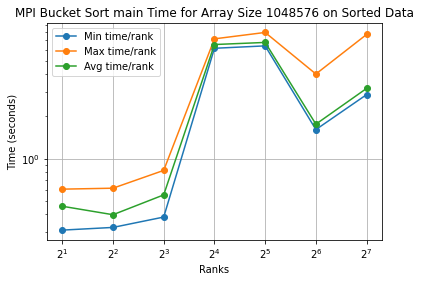

(<Figure size 432x288 with 1 Axes>,
 <Axes: title={'center': 'MPI Bucket Sort main Time for Array Size 1048576 on Sorted Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [17]:
name = "main"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Min time/rank"],
        ctk.dataframe.loc[name][arraySize]["Max time/rank"],
        ctk.dataframe.loc[name][arraySize]["Avg time/rank"]
        ], 
    title="MPI Bucket Sort {} Time for Array Size {} on Sorted Data".format(name, arraySize),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)